In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

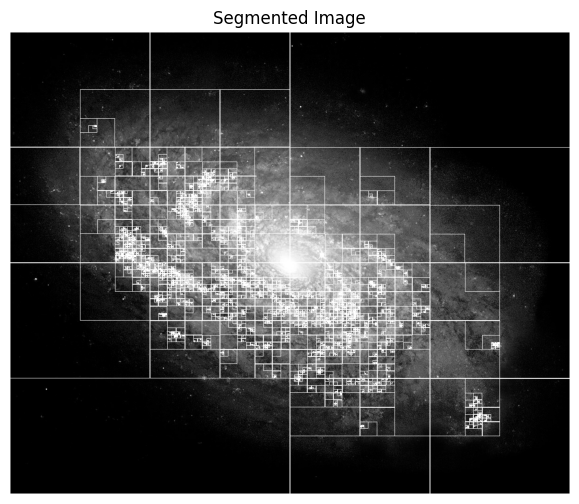

In [69]:
def homogeneity_criteria(region):
    return np.std(region) # Standard deviation as homogeneity criteria will highlight the regions with high intensity variation

def split_and_merge(image, threshold=100):
    def recursive_split_merge(region):
        h, w = region.shape[:2]
        #mean_value = np.mean(region)
        # Check if region is bigger than 1x1 and if homogenity criteria is met
        if h > 1 and w > 1 and homogeneity_criteria(region) > threshold:            
            # Split region into quadrants
            mid_h, mid_w = h // 2, w // 2
            quadrants = [
                region[:mid_h, :mid_w],
                region[:mid_h, mid_w:],
                region[mid_h:, :mid_w],
                region[mid_h:, mid_w:]
            ]
            # Recursively split and merge each quadrant
            for i in range(len(quadrants)):
                quadrants[i] = recursive_split_merge(quadrants[i])

            # Merge quadrants
            merged_region = np.vstack((np.hstack((quadrants[0], quadrants[1])),
                                       np.hstack((quadrants[2], quadrants[3]))))
            # Add border to merged_region
            merged_region = cv2.rectangle(merged_region, (0, 0), (w-1, h-1), color=(255,0,0), thickness=1)

            return merged_region
        else:
            # Merge region
            #return np.full_like(region, mean_value) This returns a the mean value of the region to highlight the merged regions
            return region

    segmented_image = recursive_split_merge(image)
    return segmented_image

# Load image
image_path = "data/galaxy.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform split and merge
segmented_image = split_and_merge(original_image, threshold=20)

# Display segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')
plt.show()
